In [80]:
!pip install scikit-fuzzy


In [81]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# ***The Ultimate Beginners Guide to Fuzzy Logic in Python: Vacuum cleaner***

[x]

<>

***Antecedents (inputs)***

Surface: what is the difficult level of the surface? (0-5)

easy, moderate, hard

Dirt: how much dirt? (0-5)

light, moderate, heavy

Consequent (output)

Suction: what suction level should the vacuum cleaner bet set to? (0-10)

low, medium, high

***Rules...***

If surface is easy and dirt is light then suction will be low

If surface is moderate and dirt is light then suction will be medium

If surface is hard or dirt is heavy then suction will be high

In [82]:
# Inputs
surface = ctrl.Antecedent(np.arange(0, 6, 1), 'surface')
dirt = ctrl.Antecedent(np.arange(0, 6, 1), 'dirt')

# Output
suction = ctrl.Consequent(np.arange(0, 11, 1), 'suction')

In [83]:
surface.universe

array([0, 1, 2, 3, 4, 5])

In [84]:
dirt.universe

array([0, 1, 2, 3, 4, 5])

In [85]:
suction.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

# ***Membership Function.........***

In [86]:
surface.automf(number = 3, names = ['easy', 'moderate', 'hard'])
dirt.automf(number = 3, names = ['light', 'moderate', 'heavy'])

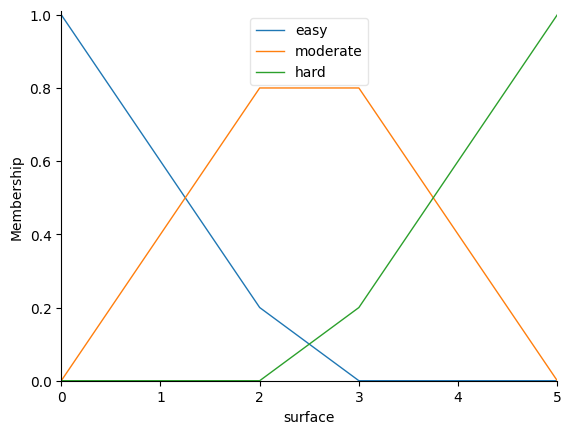

In [87]:
surface.view()

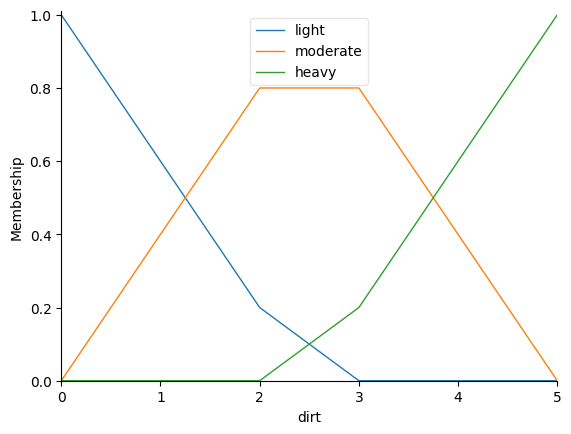

In [88]:
dirt.view()

In [89]:
suction.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

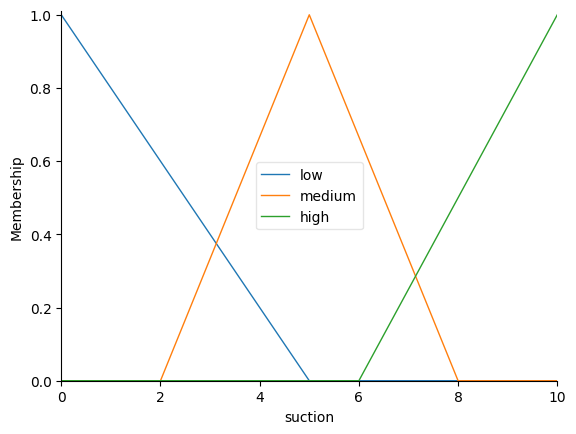

In [90]:
suction['low'] = fuzz.trimf(suction.universe, [0, 0, 5])
suction['medium'] = fuzz.trimf(suction.universe, [2, 5, 8])  # 0, 5, 10 -> on video
suction['high'] = fuzz.trimf(suction.universe, [6, 10, 10])   # 5, 10, 10 -> on video
suction.view()

In [91]:
rule1 = ctrl.Rule(surface['easy'] & dirt['light'], suction['low'])
rule2 = ctrl.Rule(surface['moderate'] & dirt['light'], suction['medium'])
rule3 = ctrl.Rule(surface['hard'] | dirt['heavy'], suction['high'])

In [92]:
control_system = ctrl.ControlSystem([rule1, rule2, rule3])

fuzzy_system = ctrl.ControlSystemSimulation(control_system)



8.622222222222224


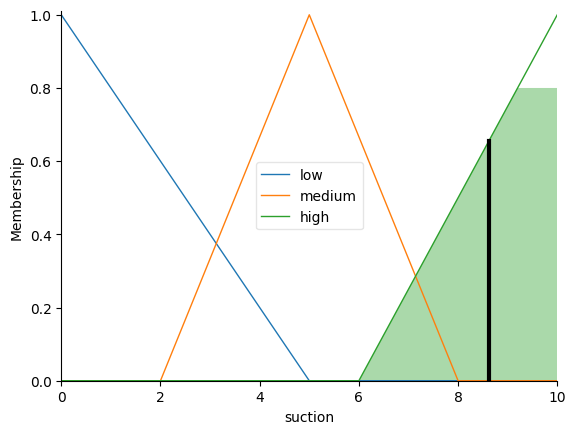

In [93]:
fuzzy_system.input['surface'] = 4.5
fuzzy_system.input['dirt'] = 3.5
fuzzy_system.compute()

print(fuzzy_system.output['suction'])
suction.view(sim = fuzzy_system)

3.3552986512524092


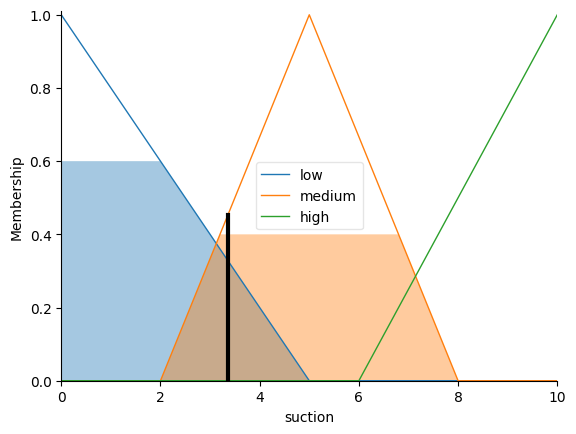

In [94]:
fuzzy_system.input['surface'] = 1.0
fuzzy_system.input['dirt'] = 1.0
fuzzy_system.compute()

print(fuzzy_system.output['suction'])
suction.view(sim = fuzzy_system)

8.666666666666668


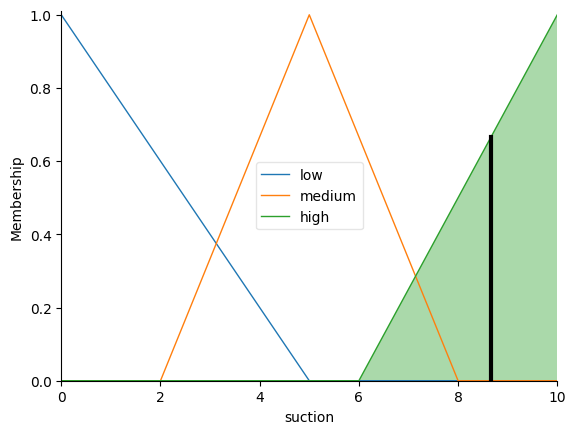

In [95]:
fuzzy_system.input['surface'] = 10.0
fuzzy_system.input['dirt'] = 10.0
fuzzy_system.compute()

print(fuzzy_system.output['suction'])
suction.view(sim = fuzzy_system)

# ***Others Functions......***

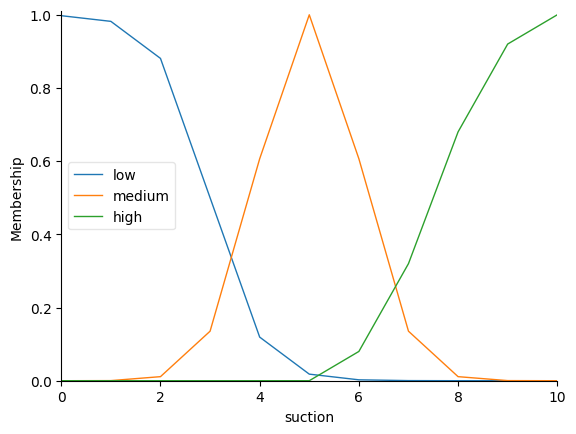

In [96]:
#sigmf means 'sigmoid function'
# gaussmf : It's a another function

suction['low'] = fuzz.sigmf(suction.universe, 3, -2)
suction['medium'] = fuzz.gaussmf(suction.universe, 5, 1)
suction['high'] = fuzz.pimf(suction.universe, 5, 10, 10, 11)
suction.view()

In [97]:
rule1 = ctrl.Rule(surface['easy'] & dirt['light'], suction['low'])
rule2 = ctrl.Rule(surface['moderate'] & dirt['light'], suction['medium'])
rule3 = ctrl.Rule(surface['hard'] | dirt['heavy'], suction['high'])

In [98]:
control_system = ctrl.ControlSystem([rule1, rule2, rule3])

fuzzy_system = ctrl.ControlSystemSimulation(control_system)



8.433621933621936


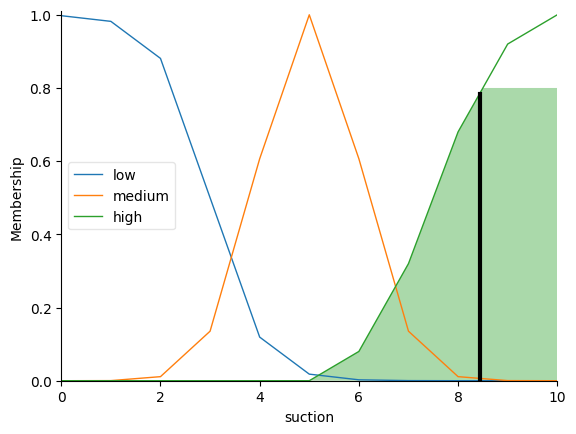

In [99]:
fuzzy_system.input['surface'] = 4.5
fuzzy_system.input['dirt'] = 3.5
fuzzy_system.compute()

print(fuzzy_system.output['suction'])
suction.view(sim = fuzzy_system)

1.6638364995712556


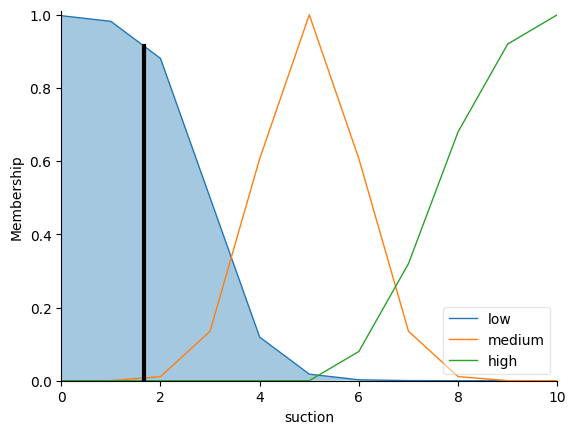

In [100]:
fuzzy_system.input['surface'] = 0.0
fuzzy_system.input['dirt'] = 0.0
fuzzy_system.compute()

print(fuzzy_system.output['suction'])
suction.view(sim = fuzzy_system)

8.509333333333334


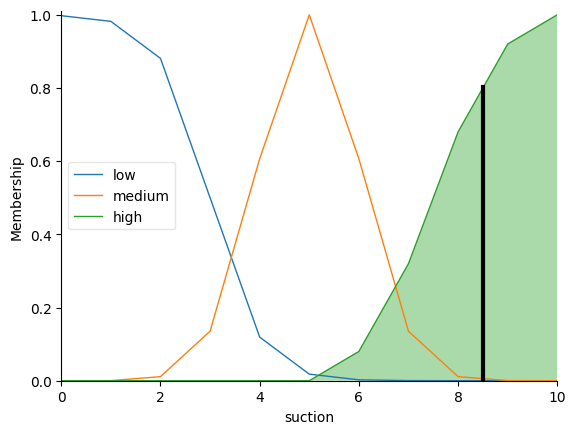

In [101]:
fuzzy_system.input['surface'] = 10.0
fuzzy_system.input['dirt'] = 10.0
fuzzy_system.compute()

print(fuzzy_system.output['suction'])
suction.view(sim = fuzzy_system)